# **Analysis of Configurations**

In [68]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [45]:
dirs = ['./old_tests/resolution/sparse/', './old_tests/resolution/medium/', './old_tests/resolution/noisy/']
#dirs = ['./config_testing/framerate/stats/']
dfs = []
column_order = ['Video', 'Model', 'Width (px)', 'Height (px)', 'Frame Rate (fps)']

for dir in dirs:
    file_list = os.listdir(dir)

    for file in file_list:
        file_path = os.path.join(dir, file)

        if '.txt' == os.path.splitext(file_path)[1]:
            df = pd.read_csv(file_path, \
                             sep=': ', header=None, engine='python').set_index(0)
            df = df.transpose().reset_index(drop=True)
            
            config_params = file.split('_')
            
            if config_params[0] in ['medium', 'noisy', 'sparse']:
                # Setting columns based on params
                df['Video'], df['model'], df['Width (px)'], df['Height (px)'], df['Frame Rate (fps)'] = \
                config_params[0], config_params[1], int(config_params[2]), int(config_params[3]), int((config_params[4])[:-3])
                
                
                # Add columns
                df['Resolution (px)'] = int(df['Width (px)']) * int(df['Height (px)'])
                df['Resolution (1000s of px)'] = df['Resolution (px)'] / 1000
                df['Energy (1000s of J)'] = df['energy'] / 1000
                df['Energy (1000s of J) per frame'] = df['Energy (1000s of J)'] / 250

                # Reordering columns
                df = df.reindex(columns=column_order+[x for x in df.columns if x not in column_order])

                dfs.append(df)

In [69]:
dirs = ['./config_testing/framerate/stats/']#, './config_testing/resolution/stats/']
for dir in dirs:
    file_list = os.listdir(dir)

    for file in file_list:
        file_path = os.path.join(dir, file)

        if '.txt' == os.path.splitext(file_path)[1]:
            
            # Process lines in stats.txt file
            df = pd.read_csv(file_path, \
                             sep=': ', header=None, engine='python').set_index(0)
            df = df.transpose().reset_index(drop=True)
            
            config_params = file.split('_')
            
            # Setting columns based on params
            df['Video'], df['Width (px)'], df['Height (px)'], df['Frame Rate (fps)'] = \
            str(config_params[0]), int(config_params[1]), int(config_params[2]), int(config_params[3])
            
            # Add columns
            df['Resolution (px)'] = int(df['Width (px)']) * int(df['Height (px)'])
            df['Resolution (1000s of px)'] = df['Resolution (px)'] / 1000
            df['Energy (1000s of J)'] = df['energy'] / 1000
            df['Energy (J) per frame'] = df['energy'] / 250
        
            dfs.append(df)
config_data = pd.concat(dfs).reset_index(drop=True)

            

In [71]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
config_data.to_csv("data.csv")

In [65]:
# Select only the numeric columns
numeric_columns = df.select_dtypes(include='number')
print(numeric_columns.dtypes)


# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_columns.corr()

# Print the correlation matrix
print(correlation_matrix)

0
frames                      float64
frames processed            float64
runtime (inference)         float64
average time per frame      float64
runtime (total)             float64
energy                      float64
avg power                   float64
energy per frame            float64
mAP                         float64
Width (px)                    int64
Height (px)                   int64
Frame Rate (fps)              int64
Resolution (px)               int64
Resolution (1000s of px)    float64
Energy (1000s of J)         float64
Energy (J) per frame        float64
dtype: object
0                         frames  frames processed  runtime (inference)  \
0                                                                         
frames                       NaN               NaN                  NaN   
frames processed             NaN               NaN                  NaN   
runtime (inference)          NaN               NaN                  NaN   
average time per frame       NaN 

In [67]:
corrdf = df[['Frame Rate (fps)', 'frames', 'runtime (inference)', 'energy']]
    correlation_matrix = corrdf.corr()
    print(correlation_matrix)

0                    Frame Rate (fps)  frames  runtime (inference)  energy
0                                                                         
Frame Rate (fps)                  NaN     NaN                  NaN     NaN
frames                            NaN     NaN                  NaN     NaN
runtime (inference)               NaN     NaN                  NaN     NaN
energy                            NaN     NaN                  NaN     NaN


In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i)+ for i in range(df.shape[1])]

print(vif_data)


                     Feature  VIF
0                     frames  0.0
1           frames processed  0.0
2        runtime (inference)  0.0
3     average time per frame  0.0
4            runtime (total)  NaN
5                     energy  0.0
6                  avg power  NaN
7           energy per frame  0.0
8                        mAP  0.0
9                 Width (px)  NaN
10               Height (px)  0.0
11          Frame Rate (fps)  0.0
12           Resolution (px)  0.0
13  Resolution (1000s of px)  NaN
14       Energy (1000s of J)  0.0
15      Energy (J) per frame  0.0


c:\Users\shiva\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\Users\shiva\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [ ]:
config_data.sort_values('mAP')

In [54]:
# Calculate the correlation between 'accuracy' and all other numeric columns
correlation = df.corr()['mAP']

# Print the correlation values
print(correlation)

0
frames                     NaN
frames processed           NaN
runtime (inference)        NaN
average time per frame     NaN
runtime (total)            NaN
energy                     NaN
avg power                  NaN
energy per frame           NaN
mAP                        NaN
Width (px)                 NaN
Height (px)                NaN
Frame Rate (fps)           NaN
Resolution (px)            NaN
Resolution (1000s of px)   NaN
Energy (1000s of J)        NaN
Energy (J) per frame       NaN
Name: mAP, dtype: float64


In [10]:
def plot_with_best_fit(df, x_name, y_name, vid_level=None):
    
    # If video level was specified, filter df to just those rows
    if vid_level in ['sparse', 'medium', 'noisy']:
        df = df[df['Test Video'] == vid_level]
    
    # Create scatter plot
    sns.regplot(x=x_name, y=y_name, data=df, scatter_kws={'s': 50}, ci=None)

    # Calculate the regression equation using numpy's polyfit function
    # coefficients = np.polyfit(df[x_name], df[y_name], deg=1)
    # slope = coefficients[0]
    # intercept = coefficients[1]

    # Add the regression equation as an annotation on the plot
    # equation = f'y = {slope:.2f}x + {intercept:.2f}'
    # plt.annotate(equation, xy=(0.6, 0.9), xycoords='axes fraction', fontsize=12)

    # Add labels and title
    plt.title('Energy Usage vs Resolution')
    plt.xlabel(x_name)
    plt.ylabel('Energy (Joules)')
    
    plt.savefig('res.png', dpi=100)




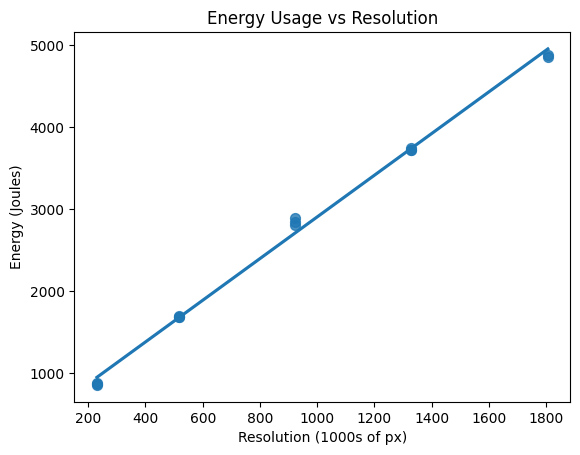

In [27]:
plot_with_best_fit(config_data, 'Resolution (1000s of px)', 'energy')

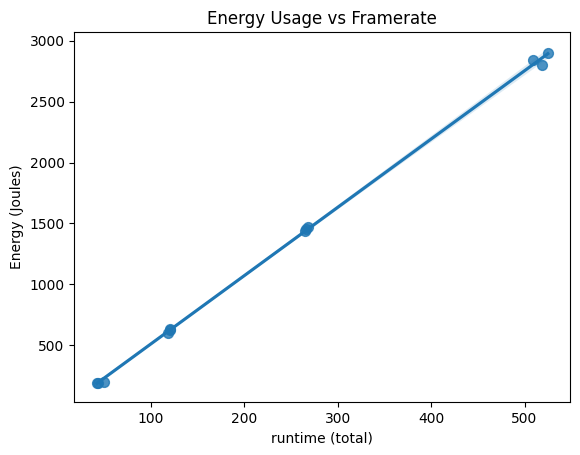

In [18]:
plot_with_best_fit(config_data, 'runtime (total)', 'energy')

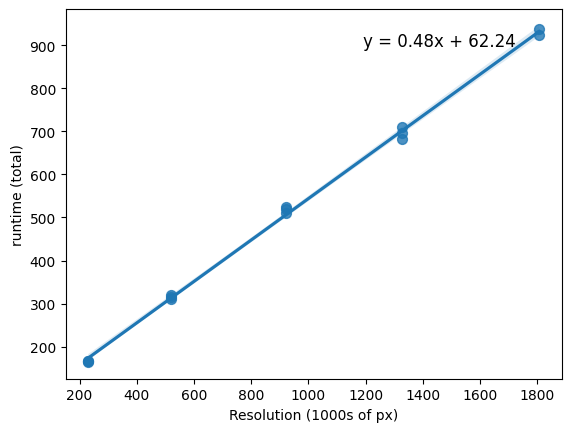

In [17]:
plot_with_best_fit(config_data, 'Resolution (1000s of px)', 'runtime (total)')

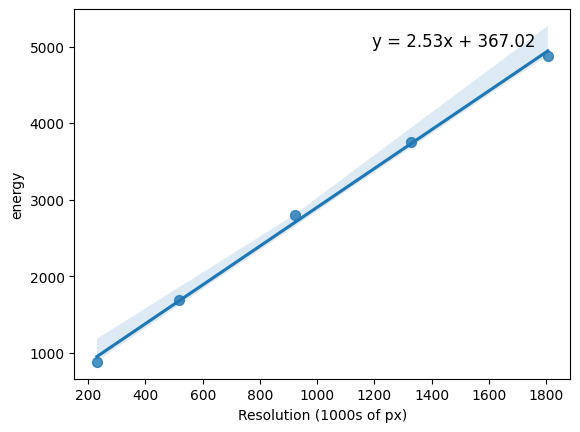

In [18]:
plot_with_best_fit(config_data, 'Resolution (1000s of px)', 'energy', 'sparse')

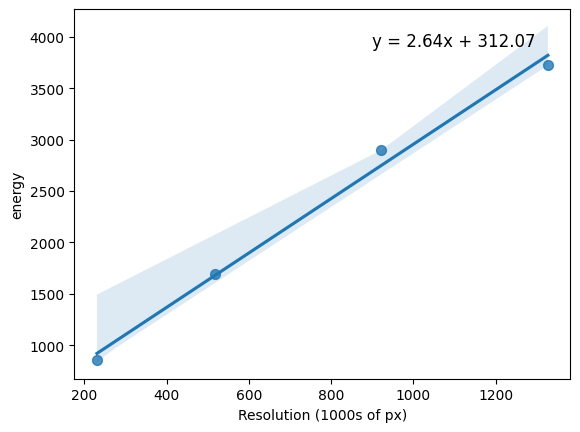

In [19]:
plot_with_best_fit(config_data, 'Resolution (1000s of px)', 'energy', 'medium')

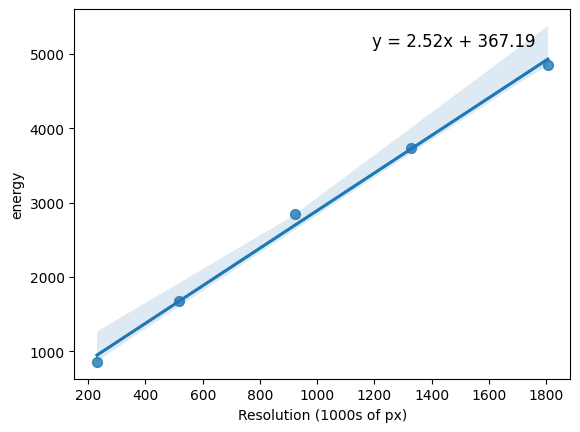

In [20]:
plot_with_best_fit(config_data, 'Resolution (1000s of px)', 'energy', 'noisy')